# Interpolation of GMAT ephemeridis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np


In [2]:
# \s+ whorks for multiple whitespaces as separators because the tab char is different on my computer
data = pd.read_table('G01_2070_2_900s_GMAT.txt', sep='\s+',header=0)
data.head(5)


,%,GPSTIME,X,Y,Z,VX,VY,VZ
0,2458736.5,0.000000,-1.419130e+07,4.333878e+06,2.181182e+07,-532.781897,-2764.724409,231.537398
1,2458736.5,0.010417,-1.473848e+07,1.856829e+06,2.182825e+07,-681.212656,-2730.471331,-194.895221
2,2458736.5,0.020833,-1.541258e+07,-5.645504e+05,2.146239e+07,-813.325899,-2641.549981,-616.746642
3,2458736.5,0.031250,-1.619501e+07,-2.882787e+06,2.072172e+07,-920.615369,-2502.107219,-1026.571255
4,2458736.5,0.041667,-1.705997e+07,-5.054936e+06,1.962031e+07,-995.573033,-2318.021890,-1417.229581


In [3]:
# The timing data are given in Julian date. The % column represents the Julian date of the day,
# while the 'GPS' time represent the time as fraction of a day

t = np.array(data['GPSTIME']) #Time from start
N = t.shape[0]-1  # Number of divisions
#The last time
t[-1] = 1.0 #The last value is 0.0 instead of 1.0 beacuse the Julian date is changed


x,y,z,vx,vy,vz = data['X'], data['Y'], data['Z'], data['VX'], data['VY'], data['VZ']

f = interp1d(t, [x,y,z, vx,vy,vz])


### A plot to see the quality of the fit

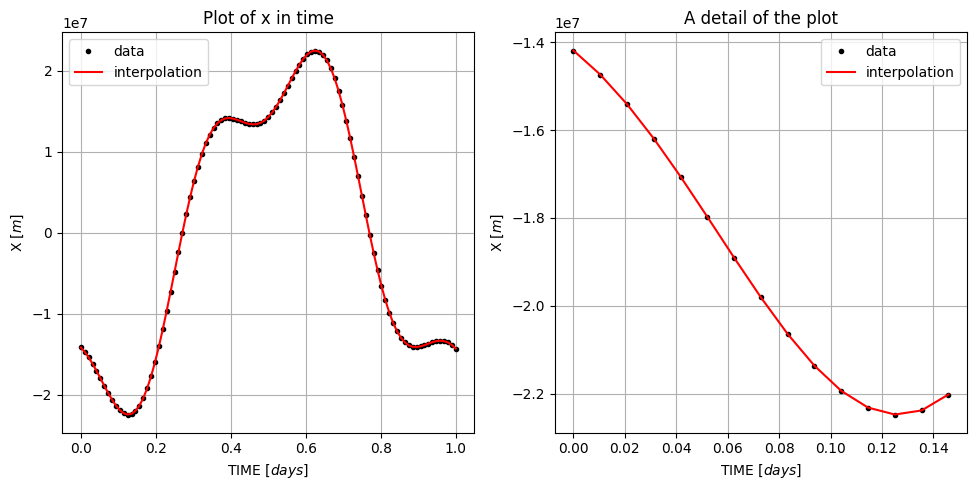

In [4]:
fig, axs = plt.subplots(1,2, figsize=[10,5])

axs[0].set_title('Plot of x in time')
axs[0].grid()
axs[0].set_xlabel('TIME [$days$]')
axs[0].set_ylabel(r'X [$m$]')
axs[0].plot(t,x, 'k.', label='data')
axs[0].plot(t, f(t)[0], 'r-', label='interpolation')
axs[0].legend()

axs[1].set_title('A detail of the plot')
n = 15
axs[1].grid()
axs[1].set_xlabel('TIME [$days$]')
axs[1].set_ylabel(r'X [$m$]')
axs[1].plot(t[0:n],x[0:n], 'k.', label='data')
axs[1].plot(t[0:n], f(t[0:n])[0], 'r-', label='interpolation')
axs[1].legend()

fig.tight_layout()


# Generation of new data
Data are taken every 1day/96 = 900 s. To have them every 60 seconds I multiply the number of points by 15 to have 1440 points

In [5]:
T = np.linspace(0, 1.0, N*15+1)

# Creating an array for the julian date and adding one to the last value
julian_date = [data['%'][0]]*T.shape[0]
julian_date[-1] = julian_date[0]+1

new_data = pd.DataFrame({'%': julian_date, 'T':T, 'X':f(T)[0], 'Y':f(T)[1], 'Z':f(T)[2], 'VX':f(T)[3], 'VY':f(T)[4], 'VZ':f(T)[5]})
new_data.to_csv('G01_2070_2_900s_GMAT_DENSE.txt', sep='\t', index=False)


In [6]:
x_range = max(x)-min(x)
print(x_range)
y_range = max(y)-min(y)
print(y_range)
z_range = max(z)-min(z)
print(z_range)


44944588.373772204
44764721.440757394
43965739.248449996


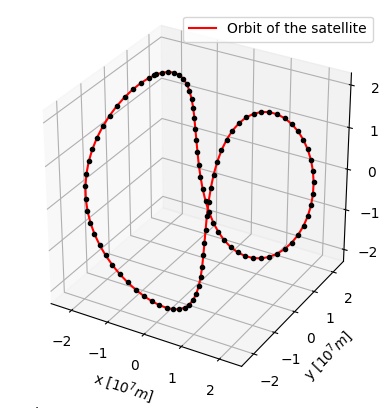

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(f(T)[0], f(T)[1], f(T)[2], 'r', label = 'Orbit of the satellite')
ax.plot(x,y,z,'k.')
ax.set_box_aspect([1,1,1])
ax.set_xlabel(f'x [$10^7 m$]')
ax.set_ylabel(f'y [$10^7 m$]')
ax.set_zlabel(f'z [$10^7 m$]')
ax.legend()
